<a href="https://colab.research.google.com/github/umar052001/Neural-Network_Regression/blob/master/03_introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolusional Neural Networks and Computer Vision with Tensorflow.
Computer vision is practice of writing algorithm which can discover patterns in visual data. Such as camera of a self-driving car recognizing the in front.

## Get data
The images we're working with are from food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However, we've modified it to use only two of them. (Pizza and Steak)

> We start with smaller dataset so we can experiment quickly and figure out what works and what dosen't.

In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-09-06 14:58:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   256MB/s    in 0.4s    

2022-09-06 14:58:41 (256 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect data
A very crucial step at beggining on any machine learning project is becoming one with the data.

And for our computer vision project...this ususlly means visualizing many samples of our data.

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train

pizza  steak


In [6]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [7]:
import os 
# Walk through the pizza steak directory and figure out the number of  files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  if(len(filenames) > 1): # Because there was an extra file in our directory ".DS_Store"
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [8]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
num_steak_images_test, num_steak_images_train, num_pizza_images_test, num_pizza_images_train

(250, 750, 250, 750)

To visualize our images lets get the classnames programatically.

In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")

# Create a list of class_names from subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [10]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

Image shape: (384, 512, 3)


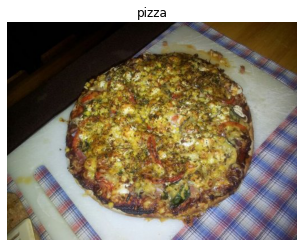

In [11]:
img = view_random_image("pizza_steak/train/", "pizza")

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 45,  25,   0],
        [ 44,  24,   0],
        [ 43,  23,   0]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 46,  26,   1],
        [ 44,  24,   0],
        [ 43,  23,   0]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 46,  26,   1],
        [ 45,  25,   0],
        [ 44,  24,   0]],

       ...,

       [[100,  96,  59],
        [107, 103,  66],
        [113, 109,  72],
        ...,
        [ 56,  56,  66],
        [ 40,  43,  52],
        [ 36,  40,  49]],

       [[104,  99,  61],
        [112, 106,  70],
        [118, 112,  76],
        ...,
        [ 67,  69,  81],
        [ 54,  58,  69],
        [ 52,  56,  67]],

       [[106,  98,  61],
        [113, 105,  68],
        [115, 107,  71],
        ...,
        [ 50,  52,  6

In [13]:
img.shape # width height colorchannels

(384, 512, 3)

In [14]:
# Get all the pixel values between 0 and 1
img/255

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.17647059, 0.09803922, 0.        ],
        [0.17254902, 0.09411765, 0.        ],
        [0.16862745, 0.09019608, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.18039216, 0.10196078, 0.00392157],
        [0.17254902, 0.09411765, 0.        ],
        [0.16862745, 0.09019608, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.18039216, 0.10196078, 0.00392157],
        [0.17647059, 0.09803922, 0.        ],
        [0.17254902, 0.09411765, 0.        ]],

       ...,

       [[0.39215686, 0.37647059, 0.23137255],
        [0.41960784, 0.40392157, 0.25882353],
        [0.44313725, 0

## An end-to-end example
Lets build our CNN to find patterns in our images, more specifically we need way to:
* Load our images
* Preprocess our images
* Build CNN to find patterns in our images.
* Compile our CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess (scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (Same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))                        

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 313ms/step - loss: 0.5430 - accuracy: 0.7140 - val_loss: 0.4154 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4251 - accuracy: 0.8140 - val_loss: 0.3401 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 12s 259ms/step - loss: 0.3720 - accuracy: 0.8400 - val_loss: 0.3354 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 15s 307ms/step - loss: 0.3384 - accuracy: 0.8500 - val_loss: 0.3100 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 20s 430ms/step - loss: 0.3096 - accuracy: 0.8707 - val_loss: 0.3020 - val_accuracy: 0.8720


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before
Trying the last model built in classification neural networks practice with images data.

In [17]:
tf.random.set_seed(42)

# Create 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

# Compile
model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit
history_2 = model_2.fit(train_data, epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 214ms/step - loss: 1.2382 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 254ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more params than our CNN (model_1) model_2 performs terribly.

In [19]:
tf.random.set_seed(42)

# Create 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

# Compile
model_3.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit
history_3 = model_3.fit(train_data, epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 3.7151 - accuracy: 0.6240 - val_loss: 0.8002 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.7351 - accuracy: 0.7180 - val_loss: 0.6630 - val_accuracy: 0.6680
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6844 - accuracy: 0.7273 - val_loss: 0.4503 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.5953 - accuracy: 0.7633 - val_loss: 1.5837 - val_accuracy: 0.5320
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6841 - accuracy: 0.7440 - val_loss: 0.5768 - val_accuracy: 0.7500


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# Binary Classification: Lets break it.
1. Become one with the data (Visualize)
2. Preprocess the data (prepare it for our model, main step is scaling/normalizing)
3. Create a model (Start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satified (experiment, experiment, experiment)


## Become one with data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


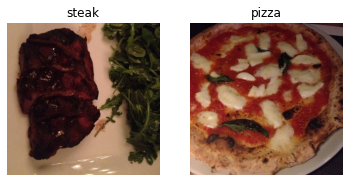

In [21]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak" )
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data

In [22]:
# Define irectory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn our data in **batches**. Whereas a batch is small set of training set on which our model looks at during training.

It does this for couple of reasons:
1. All the data might not fit into memory of your processor.
2. Trying to learn the patterns in one hit could result in the model not being able to learn very well.

Why 32? 

Ask Yann Lecun (founder of CNN, Cheif AI scientist at Facebook).

According to him. Its good for health...

In [23]:
# Create the train and test generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Load data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Getting the sample of a train batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [26]:
len(train_data)

47

In [27]:
1500/32

46.875

In [28]:
# Get first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [29]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN model (Start with baseline)
A basline is relatively simpler model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting you try to beat baseline.

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create a basline of three layer CNN
tf.random.set_seed(42)

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Binary classification that's why one output neuron
])

In [31]:
# Compile our model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the model

In [33]:
len(train_data), len(test_data)

(47, 16)

In [34]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)) 

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 0.6506 - accuracy: 0.6980 - val_loss: 0.4291 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4168 - accuracy: 0.8093 - val_loss: 0.4063 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3119 - accuracy: 0.8873 - val_loss: 0.3337 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.1839 - accuracy: 0.9400 - val_loss: 0.4036 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.0914 - accuracy: 0.9740 - val_loss: 0.5390 - val_accuracy: 0.7640


## 5. Evaluate our model

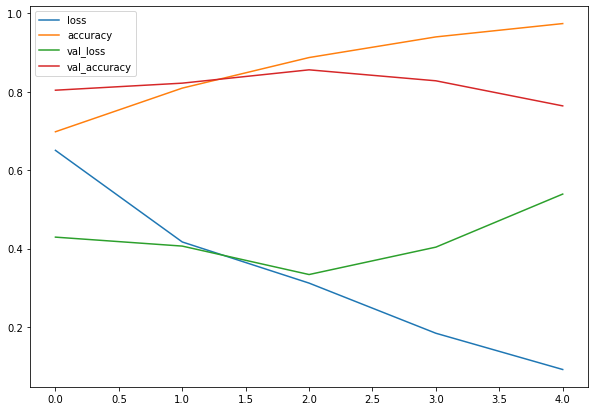

In [35]:
# Plotting the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [36]:
# Ploting validation and training curves seperately
def plot_loss_curve(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epoch")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="accuracy_loss")
  plt.title("Accuracy")
  plt.xlabel("epoch")
  plt.legend()

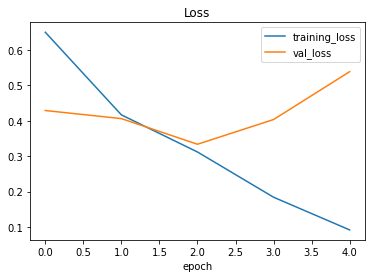

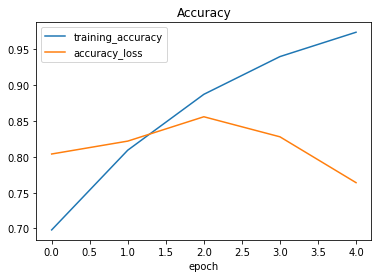

In [37]:
# Check out the loss and accuracy of model_4
plot_loss_curve(history_4)

> When a model's **validation loss starts to increase** it's likely that model is **overfitting** the training dataset. This means it's learning the patterns in dataset too well and thus the model's ability to generlize to unseen data will be diminished.

## 6. Adjust the model parameters
Fitting comes in 3 steps:
0. Create a base line
1. Beat the baseline by overfitting the larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers.
* Increase the number of filters.
* Add another Dense layer to the output of our flatten layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2dD)
* Add more data...

In [38]:
# Create the model (a new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [39]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [40]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 209ms/step - loss: 0.6347 - accuracy: 0.6627 - val_loss: 0.4964 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4807 - accuracy: 0.7713 - val_loss: 0.5165 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.4517 - accuracy: 0.7907 - val_loss: 0.4392 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4174 - accuracy: 0.8180 - val_loss: 0.3644 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3830 - accuracy: 0.8280 - val_loss: 0.3317 - val_accuracy: 0.8540


In [41]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

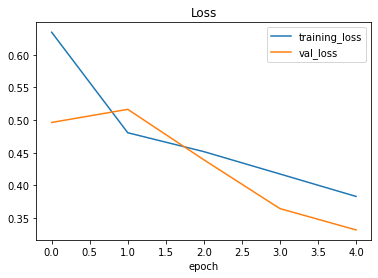

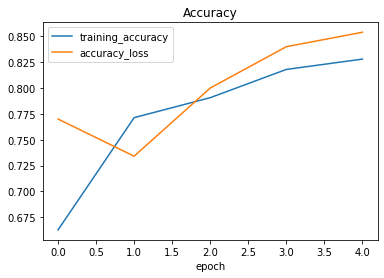

In [42]:
plot_loss_curve(history_5)

## Finding data augmentation

In [43]:
# Create ImagesDataGenerator traininginstance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
# Import data and augment it from training directories
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
# Create non-augmented train data batches
print("Non Augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non augmented test data:")
test_data = test_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training data: 
Found 1500 images belonging to 2 classes.
Non augmented test data:
Found 1500 images belonging to 2 classes.


In [45]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 8


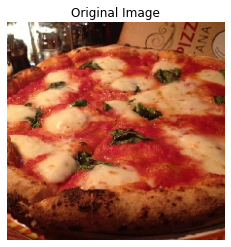

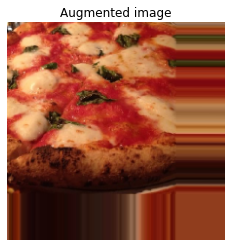

In [46]:
random_number = random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [47]:
# Creating a model with augmented data
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 590ms/step - loss: 0.8670 - accuracy: 0.4213 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 27s 587ms/step - loss: 0.6930 - accuracy: 0.5067 - val_loss: 0.6617 - val_accuracy: 0.7127
Epoch 3/5
47/47 [==============================] - 27s 584ms/step - loss: 0.6850 - accuracy: 0.5833 - val_loss: 0.6252 - val_accuracy: 0.6227
Epoch 4/5
47/47 [==============================] - 27s 586ms/step - loss: 0.7267 - accuracy: 0.5287 - val_loss: 0.6691 - val_accuracy: 0.5493
Epoch 5/5
47/47 [==============================] - 28s 607ms/step - loss: 0.6645 - accuracy: 0.6447 - val_loss: 0.6221 - val_accuracy: 0.7627


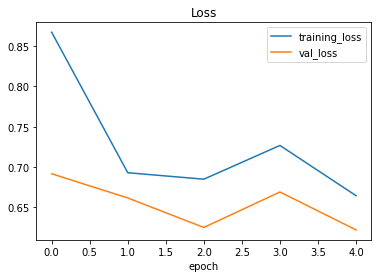

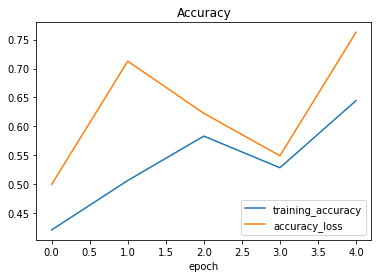

In [48]:
plot_loss_curve(history_6)

In [49]:
# Import data and augment it and shuffle it in train directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           shuffle=True,
                                                                           class_mode="binary",
                                                                           batch_size=32)

Found 1500 images belonging to 2 classes.


In [50]:
# Create 
model_7 = Sequential([
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
# Compile
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
# Fit with shuffled augmented train data
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 588ms/step - loss: 0.6548 - accuracy: 0.6220 - val_loss: 0.5374 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 27s 582ms/step - loss: 0.5495 - accuracy: 0.7180 - val_loss: 0.4387 - val_accuracy: 0.7947
Epoch 3/5
47/47 [==============================] - 27s 580ms/step - loss: 0.5127 - accuracy: 0.7560 - val_loss: 0.4147 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 27s 578ms/step - loss: 0.5031 - accuracy: 0.7660 - val_loss: 0.4031 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 27s 576ms/step - loss: 0.4673 - accuracy: 0.7860 - val_loss: 0.4631 - val_accuracy: 0.8120


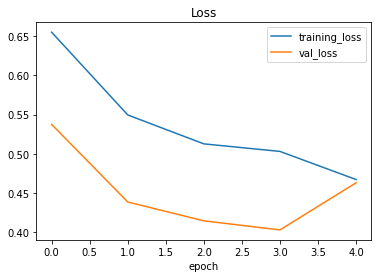

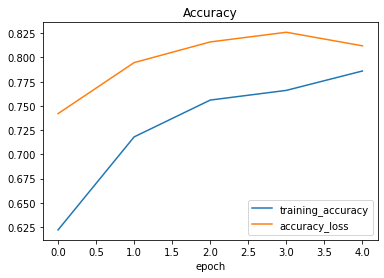

In [51]:
plot_loss_curve(history_7)

## 7. Repeat until satisfied
Since we've already beaten our baseline, there are few things we could try to continue to improve our model:]
* Increase the number of model layers(`Conv2D` or `MaxPool2D`)
* Increase the number of filters
* Train for longer(more epochs)
* Find an ideal learning rate.
* Get more data
* Use transfer learning to leverage what another model has learned to adjust it for our own use case.

## Making a prediction with our trained model on our custom data

In [52]:
print(class_names)

['pizza' 'steak']


--2022-09-06 15:09:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2022-09-06 15:09:02 (212 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

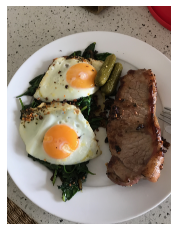

In [53]:
# View example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

> Our custom data must be preprocessed similarly as our model

In [54]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a 
  tensor and reshapes it to (imag_shape, img_shape, color_channel).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image and get all values between 0 and 1
  img = img/255.
  return img

In [55]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [56]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

In [57]:
# We index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [95]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located filename, makes a prediction with model
  and plots the image with the predicted class as title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic of multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

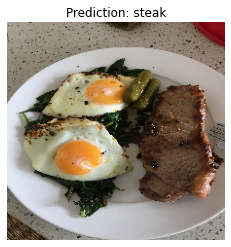

In [59]:
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Lets try it on another custom image

--2022-09-06 15:09:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-09-06 15:09:04 (261 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



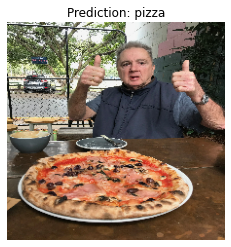

In [60]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_1, "03-pizza-dad.jpeg")

# Multiclass Image Classification 
1. Become one with the data
2. Preprocess the data
3. Create the model
4. Fit the model (overfit it to make sure it works or learning something)
5. Evaluate the model
6. Adjust different hyperparameters to improve the model
7. Repeat until satisfied

## 1. Import and become one with data

In [61]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-06 15:09:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  16.2MB/s    in 21s     

2022-09-06 15:09:27 (23.6 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [62]:
import os
# Walk through 10 classes of image food data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

There are 2 directories and 0 images in '10_food_classes_all_data' 
There are 10 directories and 0 images in '10_food_classes_all_data/test' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon' 
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger' 
There are 

In [63]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [64]:
# Lets get the class_names
import numpy as np
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (453, 512, 3)


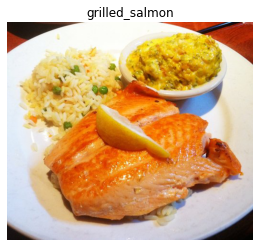

In [69]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data


In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model(start with the baseline)
Lets replicate the CNN explainer tuny vgg architechture

In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

model_8 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])
# Compile
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

## 4. Fit the model

In [78]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 204ms/step - loss: 1.1317 - accuracy: 0.6333 - val_loss: 2.3010 - val_accuracy: 0.2768
Epoch 2/5
235/235 [==============================] - 51s 217ms/step - loss: 0.5585 - accuracy: 0.8284 - val_loss: 3.1539 - val_accuracy: 0.2688
Epoch 3/5
235/235 [==============================] - 51s 217ms/step - loss: 0.2174 - accuracy: 0.9377 - val_loss: 4.2027 - val_accuracy: 0.2616
Epoch 4/5
235/235 [==============================] - 48s 204ms/step - loss: 0.0856 - accuracy: 0.9799 - val_loss: 5.4160 - val_accuracy: 0.2608
Epoch 5/5
235/235 [==============================] - 47s 199ms/step - loss: 0.0335 - accuracy: 0.9949 - val_loss: 6.5646 - val_accuracy: 0.2512


## 5. Evaluate the model

In [79]:
model_8.evaluate(test_data)

79/79 [==============================] - 14s 173ms/step - loss: 6.5646 - accuracy: 0.2512


[6.564605236053467, 0.25119999051094055]

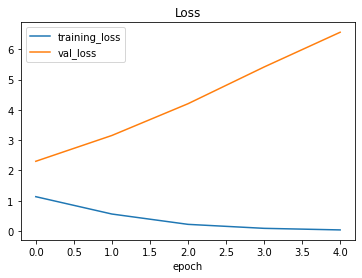

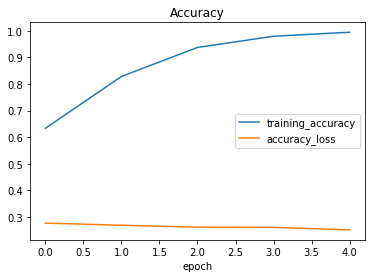

In [80]:
plot_loss_curve(history_8)

From the loss curves it seems like our model is overfitting quite badly. In other words its getting great results on the training data but fails to generalize well to unseen data and performs poorly on test data.

## 6. Adjust the model's hyperparameters (to beat the baseline/ reduce the overfitting)

Due to its performance on training data it's clear that our model is learning something...

However it's not generalizing welll.

So, let's fix it by:
1. **Getting more data**.
2. **Simpilfy the model** - Model is a bit complex and might have to remove some layers.
3. **Data Augmentation** - maniipulates training data without altering original data.
4. **Use transfer learning** - leaverges the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [81]:
# Simplify the model first
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [82]:
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [84]:
# Fit model with 2 conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 192ms/step - loss: 2.1612 - accuracy: 0.2184 - val_loss: 2.0005 - val_accuracy: 0.2848
Epoch 2/5
235/235 [==============================] - 46s 197ms/step - loss: 1.8607 - accuracy: 0.3609 - val_loss: 2.0460 - val_accuracy: 0.3016
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.4122 - accuracy: 0.5355 - val_loss: 2.0600 - val_accuracy: 0.2976
Epoch 4/5
235/235 [==============================] - 49s 208ms/step - loss: 0.8272 - accuracy: 0.7448 - val_loss: 2.3604 - val_accuracy: 0.3052
Epoch 5/5
235/235 [==============================] - 57s 242ms/step - loss: 0.3769 - accuracy: 0.8983 - val_loss: 3.0330 - val_accuracy: 0.2724


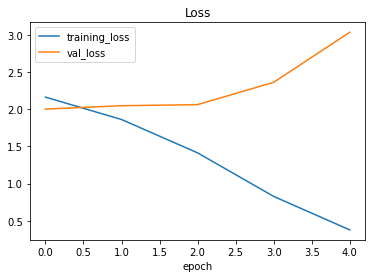

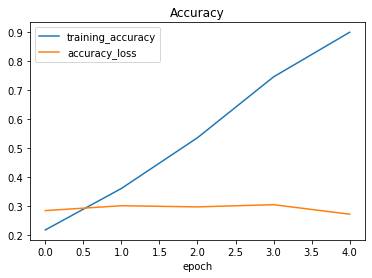

In [85]:
plot_loss_curve(history_9)

In [83]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

Simpilifying the model didn't wroked lets try data augmentation

In [86]:
# Creating augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

In [87]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [88]:
# Lets create another model and fit it with augmented data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 118s 499ms/step - loss: 2.2522 - accuracy: 0.1564 - val_loss: 2.1100 - val_accuracy: 0.2324
Epoch 2/5
235/235 [==============================] - 113s 481ms/step - loss: 2.1212 - accuracy: 0.2372 - val_loss: 2.0375 - val_accuracy: 0.2784
Epoch 3/5
235/235 [==============================] - 116s 493ms/step - loss: 2.0867 - accuracy: 0.2513 - val_loss: 1.9241 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 112s 476ms/step - loss: 2.0474 - accuracy: 0.2764 - val_loss: 1.9424 - val_accuracy: 0.3312
Epoch 5/5
235/235 [==============================] - 113s 480ms/step - loss: 2.0150 - accuracy: 0.2969 - val_loss: 1.8720 - val_accuracy: 0.3492


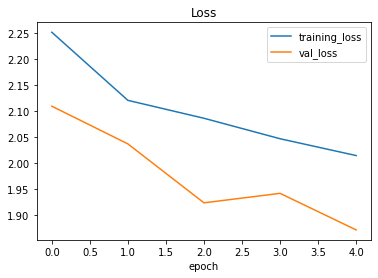

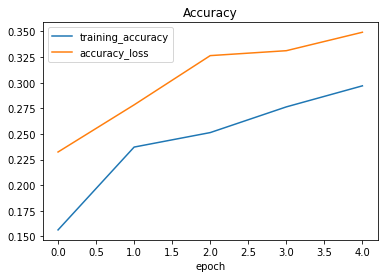

In [89]:
plot_loss_curve(history_10)

## 7. Repeat until satisfied

We could improve our model's validation/test accuracy by running lots of experiments, namely:
- restructuring our model's architechture (increase layers/ hidden units)
- adjust learning rate
- try different methods of data augmentation (adjust different hyperaparameters in ImageDataGenerator instance)
- training for longer (eg 10 epochs instead of 5 epochs)
- try **transfer learning**

## Making prediction with our trained model
Let's make some predictions on our own custom data

In [90]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [91]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2022-09-06 16:43:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.009s  

2022-09-06 16:43:43 (294 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2022-09-06 16:43:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

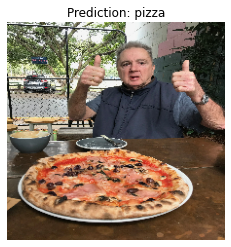

In [96]:
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names)

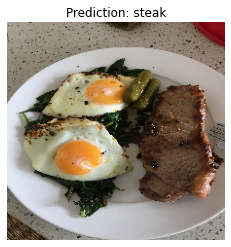

In [98]:
pred_and_plot(model_10, "03-steak.jpeg", class_names)

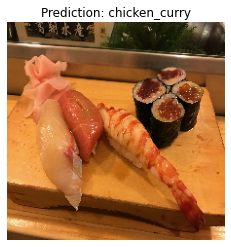

In [99]:
pred_and_plot(model_10, "03-sushi.jpeg", class_names)

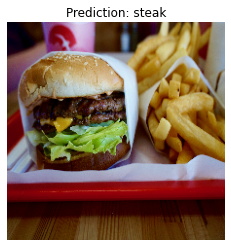

In [100]:
pred_and_plot(model_10, "03-hamburger.jpeg", class_names)

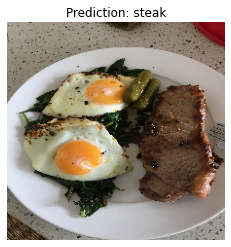

In [114]:
# Making sure that our updated pred and plot function works fine with binary class
pred_and_plot(model_1, "03-steak.jpeg", class_names=["pizza", "steak"])

  ## Saving and loading 

In [5]:
# Save the model
model_10.save("saved_trained_model_10")

In [5]:
import tensorflow as tf
# Load and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)